In [1]:
from framework_chatgpt import FrameWork

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from cobaya.run import run

from getdist.mcsamples import MCSamplesFromCobaya
from getdist import plots, MCSamples
import getdist.plots as gdplt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


frame = FrameWork(masked_val=2)

spectrum_data = np.loadtxt('./Data/B8_SuperK_Spectrum_2023.txt')

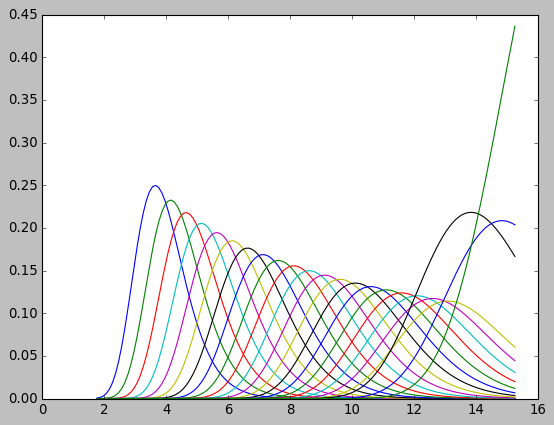

In [2]:
energy_obs = spectrum_data[:,0:2]
resp_func   = frame._response_function(energy_obs, frame.energy_recoil)

for i in range (len(energy_obs)):
    plt.plot(frame.energy_recoil,resp_func[i])

In [3]:
borom_unoscilated_spectrum = frame._compute_unoscilated_signal(frame.energy_recoil, frame.energy_nu,
                                                               frame.spectrum_nu, energy_obs,
                                                               frame.cs_electron,resp_func)



year = 365.25 * 24. * 6. * 6.
day  = 24. * 6. * 6.


b_un_year = 1e-5 * year * frame.norm * frame.target_number * borom_unoscilated_spectrum
b_un_day = 1e-5 * day * 22.5 * frame.norm * frame.target_number * borom_unoscilated_spectrum

<ErrorbarContainer object of 3 artists>

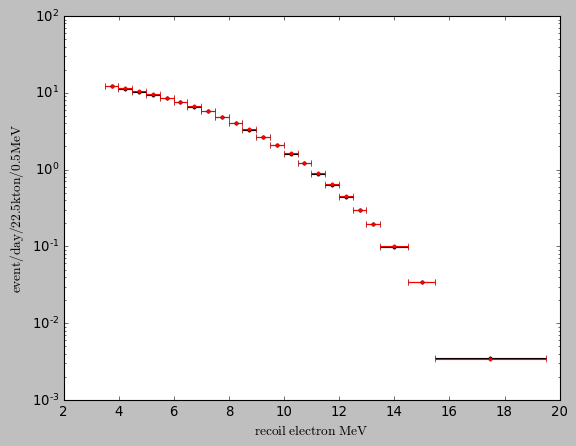

In [4]:
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
             (0.5/(energy_obs[:,1]-energy_obs[:,0]))*spectrum_data[:,11]*22.5/365.25,yerr=None,
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
            (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_day , yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

<ErrorbarContainer object of 3 artists>

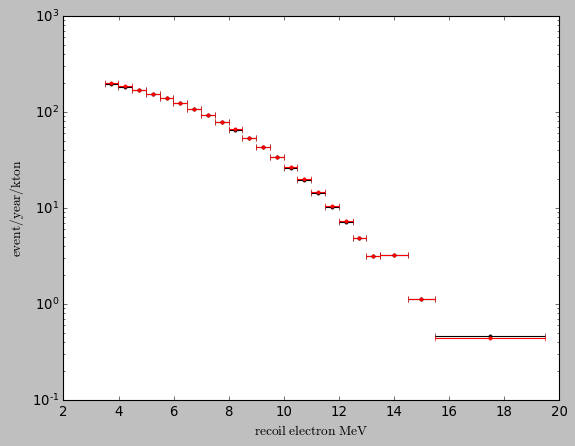

In [5]:
plt.yscale('log')
plt.ylabel(r'$\rm event/year/kton$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),spectrum_data[:,11],yerr=None,
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),b_un_year , yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

In [6]:
for i in range (23):
    print(b_un_year[i],spectrum_data[i,11],(spectrum_data[i,11]-b_un_year[i])/spectrum_data[i,11])

200.61540899066003 197.2 -0.017319518208215215
186.1401110923935 183.1 -0.016603555938795832
170.89251281103293 168.6 -0.013597347633647304
155.1624964480316 154.0 -0.007548678233971361
139.23082411194721 138.5 -0.005276708389510573
123.3802822003484 122.7 -0.005544272211478411
107.88463205673867 107.5 -0.003577972620824809
92.99873074271525 92.7 -0.003222553858848437
78.94997916108176 78.7 -0.0031763552869346107
65.93094943314611 65.6 -0.005044960871129828
54.09328024597346 53.9 -0.003585904377986303
43.54306471485916 43.2 -0.007941312843962045
34.33805339639999 34.0 -0.00994274695294095
26.487064785969583 26.2 -0.010956671220213116
19.9519602678166 19.75 -0.010225836345144243
14.652378798750505 14.44 -0.014707673043663784
10.473177502475146 10.35 -0.011901207968613143
7.2741953228086285 7.16 -0.01594906743137267
4.901539572837972 4.84 -0.012714787776440578
3.1991751155911383 3.15 -0.015611147806710605
3.250168672033758 3.22 -0.009369152805514822
1.131622645856901 1.13 -0.001435969784

In [7]:
# %%time

# for i in range(10):    
#     prediction = frame[0.319,0,7.54]
#     print(i)

In [ ]:
frame = FrameWork()
error = frame.data[:,2]
data  = frame.data[:,1]

In [4]:
def LogLikelihood(t12,mum2,m12,delta):
    prediction = frame[t12,mum2,1e-5*m12]
    return -0.5*(np.sum(np.log10(2*np.pi*error**2) + ((1+delta)*prediction-data)**2/error**2))



info = {"likelihood": {"Chi2": LogLikelihood},
        
        "params": dict([("t12"  , {"prior" : {"min": 0.2, "max": 0.4},
                                  "latex" : r"\sin(\theta_{12})^2"  }),
                        
#                         ("mum2" , 0),
                        ("mum2" , {"prior" : {"min": 0, "max": 3},
                                   "latex" : r"\Delta m_{2}^2 \ \rm 10^{-11} \ eV^2"  }),
            
                        ("m12"  , {"prior" : {"dist": "norm", "loc": 7.54, "scale" : 0.2},
                                  "latex": r"\Delta m^2_{21} \ \rm 10^{-5} \ eV^2"  }),  
                        
                        ("delta", {"prior" : {"dist": "norm", "loc": 0, "scale" : 0.04},
                                  "latex": r"\delta"  })  
                        
                        
                        ]),
        
        "sampler": {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 100000}}
       }



In [6]:
updated_info,sampler = run(info)

[chi2] Initialized external likelihood.
[prior] *WARNING* There are unbounded parameters (['m12', 'delta']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {Chi2: 103.0}
[mcmc] Initial point: t12:0.3802694, mum2:1.990635, m12:7.452251, delta:-0.02999863
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-08-17 12:11:18 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 160 samples acce

[mcmc] Learn + convergence test @ 5440 samples accepted.
[mcmc]  - Acceptance rate: 0.219
[mcmc]  - Convergence of means: R-1 = 0.029649 after 4352 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5600 samples accepted.
[mcmc]  - Acceptance rate: 0.218
[mcmc]  - Convergence of means: R-1 = 0.027775 after 4480 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5760 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.031690 after 4608 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5920 samples accepted.
[mcmc]  - Acceptance rate: 0.217
[mcmc]  - Convergence of means: R-1 = 0.021627 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:14:23 : 28366 steps taken, and 6077 accepted.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11360 samples accepted.
[mcmc]  - Acceptance rate: 0.210
[mcmc]  - Convergence of means: R-1 = 0.009054 after 9088 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11520 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.010387 after 9216 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11680 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.008142 after 9344 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 11840 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.009404 after 9472 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12000 samples accepted.
[mcmc]  - Acceptance 

[mcmc]  - Convergence of means: R-1 = 0.004472 after 13696 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17280 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.003993 after 13824 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17440 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.005069 after 13952 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17600 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.005660 after 14080 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 17760 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.005441 after 14208 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc] Learn + convergence test @ 23040 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002367 after 18432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23200 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002030 after 18560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23360 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002040 after 18688 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23520 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002331 after 18816 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 23680 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 =

[mcmc] Learn + convergence test @ 28960 samples accepted.
[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Convergence of means: R-1 = 0.005671 after 23168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:28:35 : 139738 steps taken, and 28979 accepted.
[mcmc] Learn + convergence test @ 29120 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.005054 after 23296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 29280 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.004776 after 23424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 29440 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.005320 after 23552 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 29600 samples 

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:31:35 : 168434 steps taken, and 34865 accepted.
[mcmc] Learn + convergence test @ 34880 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.007190 after 27904 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 35040 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.007734 after 28032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 35200 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.006818 after 28160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 35360 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.006434 after 28288 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Convergence of means: R-1 = 0.005826 after 32512 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:34:35 : 196896 steps taken, and 40746 accepted.
[mcmc] Learn + convergence test @ 40800 samples accepted.
[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Convergence of means: R-1 = 0.006582 after 32640 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 40960 samples accepted.
[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Convergence of means: R-1 = 0.006302 after 32768 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 41120 samples accepted.
[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Convergence of means: R-1 = 0.005732 after 32896 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 41280 samples accepted.
[mcmc]  - Acceptance rate: 0.206
[mcmc]  - Conve

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 46560 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002643 after 37248 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:37:35 : 225625 steps taken, and 46562 accepted.
[mcmc] Learn + convergence test @ 46720 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.002399 after 37376 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 46880 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.001953 after 37504 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 47040 samples accepted.
[mcmc]  - Acceptance rate: 0.205
[mcmc]  - Convergence of means: R-1 = 0.001974 after 37632 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc] Learn + convergence test @ 52320 samples accepted.
[mcmc]  - Acceptance rate: 0.203
[mcmc]  - Convergence of means: R-1 = 0.005950 after 41856 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 52480 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.006125 after 41984 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 52640 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.005828 after 42112 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 52800 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.006043 after 42240 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 52960 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 =

[mcmc] Learn + convergence test @ 58240 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.005165 after 46592 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:43:35 : 283730 steps taken, and 58311 accepted.
[mcmc] Learn + convergence test @ 58400 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.004960 after 46720 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 58560 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.004597 after 46848 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 58720 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.004431 after 46976 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 58880 samples 

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2024-08-17 12:46:35 : 312460 steps taken, and 64131 accepted.
[mcmc] Learn + convergence test @ 64160 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.001815 after 51328 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 64320 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.001754 after 51456 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 64480 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.001808 after 51584 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 64640 samples accepted.
[mcmc]  - Acceptance rate: 0.204
[mcmc]  - Convergence of means: R-1 = 0.001887 after 51712 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc] The run has converged!
[mcmc] Sampling complete after 69760 accepted steps.


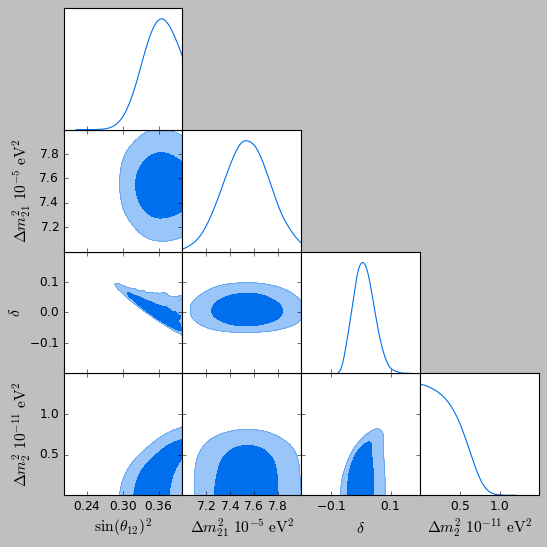

In [10]:
# Filled 2D comparison plot with legend
gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])

gdplot = gdplt.get_subplot_plotter(width_inch=7)

gdplot.settings.scaling = False
gdplot.triangle_plot(gd_sample, ["t12","m12","delta","mum2"], filled=True, 
                     param_limits={'t12': (0.2, 0.4), 
                                   'm12': (7, 8),
                                   'delta': (-0.2, 0.2),
                                   'mum2': (0, 1.5)
                                  },lw=2)

#gdplot.export('./bayes_1_nopriors.pdf')

In [ ]:
# #plt.plot(frame.day,total_event,'.')
# print(frame.borom_unoscilated_total)
# plt.plot(np.mod(frame.data[:,0],365.25)/365.25,frame.data[:,3],'.')

In [6]:
flux,dist,day = SuperkPrediction(frame.data,frame.total_days,total_event,frame.distance,frame.day)

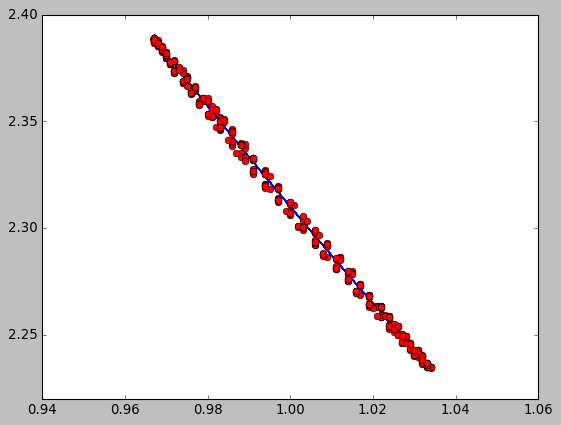

In [7]:
plt.xlim(0.94,1.06)
plt.plot(frame.distance**2,0.44*total_event,'b-')
#plt.plot(frame.data[:,6],frame.data[:,3],'g.')
plt.plot(frame.data[:,6],0.44*flux,'ro')


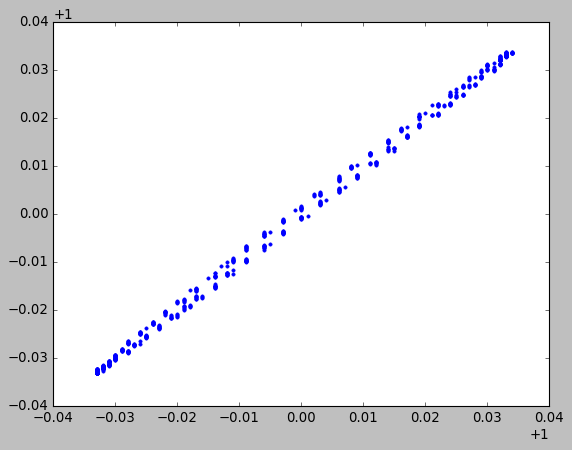

In [8]:
#plt.xlim(0,500)
#plt.plot(np.arange(0,frame.total_days,1),frame.distance**2)
#plt.plot(frame.data[:,0],frame.data[:,6],'g.')
#plt.plot(frame.data[:,0],dpredict**2,'r.')

plt.plot(frame.data[:,6],dist**2,'.')

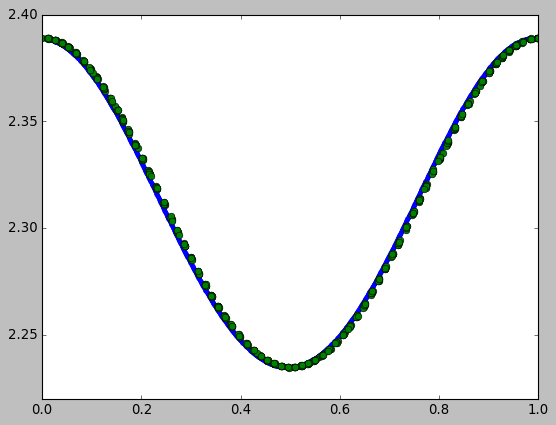

In [9]:
plt.plot(frame.day,0.44*total_event,'b.')
#plt.plot(lpredict,frame.data[:,3],'.')
plt.plot(day,0.44*flux,'go')

In [11]:
print(frame.data[(lpredict>1)&(lpredict<2)&(0.44*bin_predict>2.3),:])

[[5.53154815e+02 2.42537037e+00 2.48776620e+00 2.37000000e+00
  2.60000000e-01 2.80000000e-01 9.94000000e-01 2.35600000e+00
  2.63000000e-01 2.81000000e-01]
 [9.18720139e+02 2.49046296e+00 2.49025463e+00 2.29000000e+00
  3.20000000e-01 3.00000000e-01 9.94000000e-01 2.27700000e+00
  3.20000000e-01 2.96000000e-01]
 [2.38007956e+03 2.49901620e+00 2.49943287e+00 2.20000000e+00
  3.30000000e-01 3.00000000e-01 9.94000000e-01 2.19100000e+00
  3.26000000e-01 3.02000000e-01]]


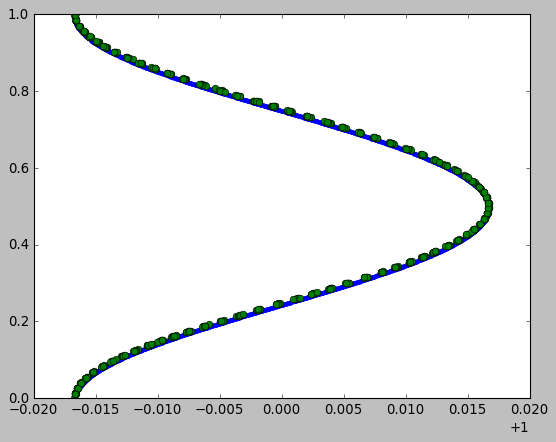

In [15]:
plt.plot(frame.distance,frame.day,'.')
plt.plot(dist,day,'o')